In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

#### Merging all the month csv files into one file

In [18]:
path= './Sales_Data'
filenames=glob.glob(path+"/*.csv")
dfs= []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
df= pd.concat(dfs,ignore_index=True)


In [19]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Augument data with additional columns
* Add Month Column

In [20]:
df['Month']= df['Order Date'].str[0:2]
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


#### There are NaNs in the dataframe,

In [21]:
print("The shape of the dataframe is {}".format(df.shape))
df.isnull().sum()

The shape of the dataframe is (186850, 7)


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

#### Clean the data (Remove the data)
<hr>
1. Use this to Select all Rows with NaN Values in Pandas DataFrame: <br>
<b> df[df['column name'].isna()]  </b> 
<hr>
2. Drop rows of NaN
<b>

In [22]:
df[df['Purchase Address'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df= df.dropna(how='all')
print("The shape of the dataframe after dropping the rows with NaNs is {}".format(df.shape))

The shape of the dataframe after dropping the rows with NaNs is (186305, 7)


#### Now we dropped the NaN's . Get back to working with the Month Column.
#### Convert the Month Column into integers , since we can see the datatype of the month column is an object

In [33]:
# df['Month']= df['Month'].astype('int32')

In [36]:
##df = df.astype({'Month':'int'})
## There are some rows with value 'Or' Unselect them
df= df[df['Order Date'].str[0:2]!='Or']
print("The shape of the dataframe after unselecting 'Or' is {}".format(df.shape))
df = df.astype({'Month':'int'})

The shape of the dataframe after unselecting 'Or' is (185950, 7)


### What was the best month with sales?
#### Sales= Ouantity Ordered * Price Each


In [43]:
df = df.astype({'Quantity Ordered':'int'})
df = df.astype({'Price Each':'float'})
df['Sales']= df['Quantity Ordered']* df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [44]:
result=df.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


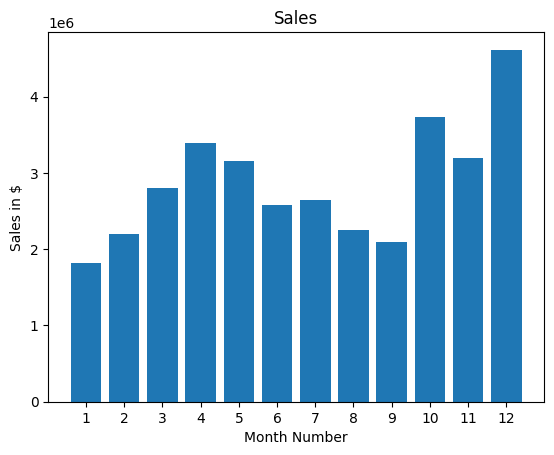

In [55]:
months= range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in $")
plt.title("Sales")
plt.show()

* December has more number of sales, because its Christmas season and people might have done lot of shopping when compared to other months

### What city has the highest number of sales
* Add a city name

In [62]:
# Make use of .apply()
# create a function
def get_city(address):
    return address.split(',')[1]
#df['City']=df['Purchase Address'].apply(lambda x : x.split(',')[1])
df['City']=df['Purchase Address'].apply(lambda x : get_city(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [63]:
df['City'].unique()

array([' Los Angeles', ' Austin', ' Seattle', ' Atlanta', ' Portland',
       ' New York City', ' San Francisco', ' Boston', ' Dallas'],
      dtype=object)

In [67]:
result_city=df.groupby('City').sum()
result_city.sort_values('Sales')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Austin,11153,1809873.61,69829,1819581.75
Portland,14053,2307747.47,87765,2320490.61
Seattle,16553,2733296.01,104941,2747755.48
Dallas,16730,2752627.82,104620,2767975.40
Atlanta,16602,2779908.20,104794,2795498.58
Boston,22528,3637409.77,141112,3661642.01
New York City,27932,4635370.83,175741,4664317.43
Los Angeles,33289,5421435.23,208325,5452570.80
San Francisco,50239,8211461.74,315520,8262203.91


In [ ]:
cities=['Los Angeles', 'Austin', 'Seattle', 'Atlanta', 'Portland','New York City', 'San Francisco', 'Boston', 'Dallas']

